# California Public Schools: Meeting ELA Standards
#### Project Description
####

In [2]:
# Import Libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings; warnings.simplefilter('ignore')

## Import Dataset

In [3]:
df = pd.read_csv('data/California_School_District_Areas_2018-19.csv')
pd.set_option('display.max_columns', None)
df.drop(columns=['OBJECTID', 'FedID', 'CDCode', 'CDSCode', 'UpdateNotes'], inplace=True)
df.shape

(944, 64)

In [60]:
df.head()

,Year,CountyName,DistrictName,DistrictType,GradeLow,GradeHigh,GradeLowCensus,GradeHighCensus,AssistStatus,CongressUS,SenateCA,AssemblyCA,LocaleDistrict,EnrollTotal,EnrollCharter,EnrollNonCharter,AAcount,AApct,AIcount,AIpct,AScount,ASpct,FIcount,FIpct,HIcount,HIpct,MRcount,MRpct,PIcount,PIpct,WHcount,WHpct,NRcount,NRpct,ELcount,ELpct,FOScount,FOSpct,HOMcount,HOMpct,MIGcount,MIGpct,SWDcount,SWDpct,SEDcount,SEDpct,UPcount,UPpct,ELATested,ELAStdMetPct,MathTested,MathStdMetPct,CCPrepCohortCount,CCPrepPct,AbsentEligCount,AbsentPct,GradCohortCount,GradPct,UCCSUReqMetPct,DropOutPct,EnrollCumulative,SuspPct,SHAPE_Length,SHAPE_Area
0,2018-19,Alameda,Alameda Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,18,"21 - Suburban, Large",11260,1877,9383,825,7.300000,28,0.2,2854,25.299999,683,6.1,1960,17.400000,1310,11.6,67,0.6,3244,28.799999,289,2.6,1601,14.2,26,0.2,67,0.6,0,0.0,1289,11.4,3523,31.299999,3144,33.500000,4567.0,69.400002,4587.0,59.700001,773.0,56.799999,11453.0,9.4,882.0,88.900002,58.900002,5.2,11600.0,2.6,57196.403944,4.733304e+07
1,2018-19,Alameda,Albany City Unified,Unified,KG,12,KG,12,General Assistance,13,09,15,"21 - Suburban, Large",3682,0,3682,111,3.000000,4,0.1,1063,28.900000,47,1.3,592,16.100000,510,13.9,6,0.2,1163,31.600000,186,5.1,583,15.8,2,0.1,12,0.3,0,0.0,312,8.5,777,21.100000,1118,30.400000,1773.0,79.199997,1795.0,72.000000,302.0,62.599998,3763.0,6.4,301.0,94.699997,63.900002,1.7,3830.0,1.9,12870.772156,7.161276e+06
2,2018-19,Alameda,Berkeley Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"12 - City, Midsize",10194,383,9811,1440,14.100000,16,0.2,731,7.200000,83,0.8,2438,23.900000,1465,14.4,14,0.1,3999,39.200001,8,0.1,953,9.3,23,0.2,265,2.6,0,0.0,1148,11.3,3331,32.700001,3275,33.400002,4614.0,66.699997,4549.0,61.700001,790.0,63.299999,10404.0,9.7,856.0,87.400002,83.300003,10.7,10534.0,1.4,44426.287405,4.376389e+07
3,2018-19,Alameda,Castro Valley Unified,Unified,KG,12,KG,12,General Assistance,"13,15","07,09,10","18,20","21 - Suburban, Large",9269,0,9269,489,5.300000,19,0.2,2539,27.400000,420,4.5,2204,23.799999,909,9.8,47,0.5,2480,26.799999,162,1.7,1021,11.0,12,0.1,68,0.7,0,0.0,800,8.6,2284,24.600000,2739,29.600000,4844.0,68.099998,4850.0,63.200001,737.0,57.099998,9433.0,7.4,742.0,92.599998,55.900002,3.0,9532.0,2.2,142338.494091,2.833205e+08
4,2018-19,Alameda,Emery Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"21 - Suburban, Large",743,0,743,326,43.900002,1,0.1,83,11.200000,11,1.5,185,24.900000,62,8.3,8,1.1,67,9.000000,0,0.0,160,21.5,1,0.1,7,0.9,0,0.0,55,7.4,600,80.800003,613,83.099998,376.0,37.099998,377.0,23.299999,40.0,22.500000,760.0,20.5,40.0,100.000000,40.000000,0.0,780.0,3.6,13762.869292,5.368212e+06


## Clean Dataset

In [4]:
# renaming the columns
df = df.rename(columns=
           {'DistrictName': 'SchoolName',
            'DistrictType': 'SchoolType',
            'AAcount': 'AfricanAmerican',
            'AApct': 'AfricanAmericanPct',
            'AIcount': 'AmericanIndian',
            'AIpct': 'AmericanIndianPct',
            'AScount': 'Asian',
            'ASpct': 'AsianPct',
            'FIcount': 'Filipino',
            'FIpct': 'FilipinoPct',
            'HIcount': 'Hispanic',
            'HIpct': 'HispanicPct',
            'MRcount': 'MultipleRace',
            'MRpct': 'MulitpleRacePct',
            'PIcount': 'PacificIslander',
            'PIpct': 'PacificIslanderPct',
            'WHcount': 'White',
            'WHpct': 'WhitePct',
            'NRcount': 'RaceNotReported',
            'NRpct': 'RaceNotReportedPct',
            'ELcount': 'EnglishLearner',
            'ELpct': 'EnglishLearnerPct',
            'FOScount': 'Foster',
            'FOSpct': 'FosterPct',
            'HOMcount': 'Homeless',
            'HOMpct': 'HomelessPct',
            'MIGcount': 'Migrant',
            'MIGpct': 'MigrantPct',
            'SWDcount': 'Disability',
            'SWDpct': 'DisabilityPct',
            'SEDcount': 'SocioEconDisadvantage',
            'SEDpct': 'SocioEconDisadvantagePct',
            'UPcount': 'Unduplicated',
            'UPpct': 'UnduplicatedPct'
            },
              inplace=False)

In [21]:
# df['MathStdMetPct'].describe()
# df['ELAStdMetPct'].describe()
# df['StudentPerformancePercent'] = ((df['MathTested'] + df['ELATested']) / 2) / df['EnrollTotal']

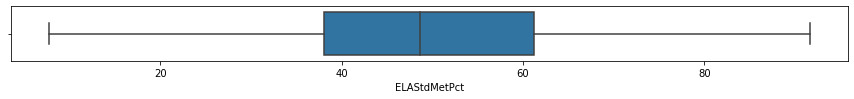

In [22]:
# target variable
plt.figure(figsize=(15,1))
sns.boxplot(data=df, x='ELAStdMetPct');

#### Null Values

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 65 columns):
Year                        944 non-null object
CountyName                  944 non-null object
SchoolName                  944 non-null object
SchoolType                  944 non-null object
GradeLow                    944 non-null object
GradeHigh                   944 non-null int64
GradeLowCensus              944 non-null object
GradeHighCensus             944 non-null int64
AssistStatus                944 non-null object
CongressUS                  944 non-null object
SenateCA                    944 non-null object
AssemblyCA                  944 non-null object
LocaleDistrict              944 non-null object
UpdateNotes                 350 non-null object
EnrollTotal                 944 non-null int64
EnrollCharter               944 non-null int64
EnrollNonCharter            944 non-null int64
AfricanAmerican             944 non-null int64
AfricanAmericanPct          944 non-n

In [54]:
## How do we want to handle null values


# are these null because they are younger schools
df['CCPrepCohortCount'] = df['CCPrepCohortCount'].replace(np.NaN, 0)

# same with the null --- for grad and drop out

#### Outliers

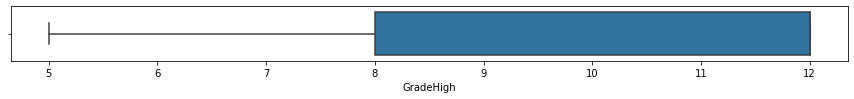

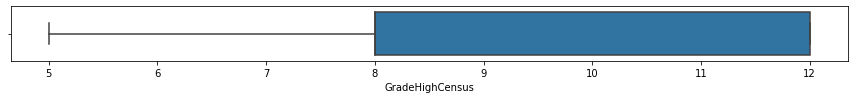

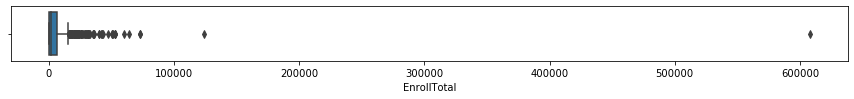

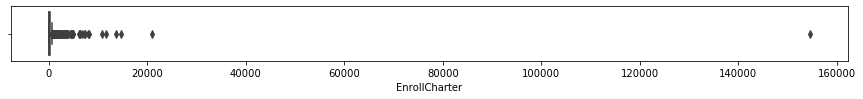

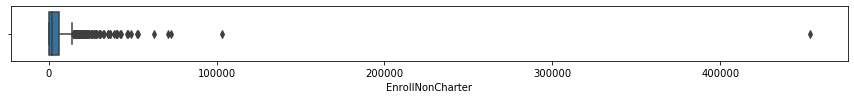

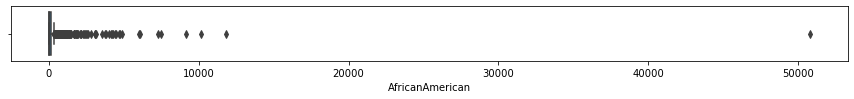

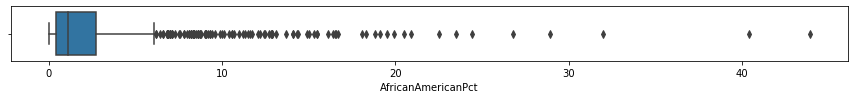

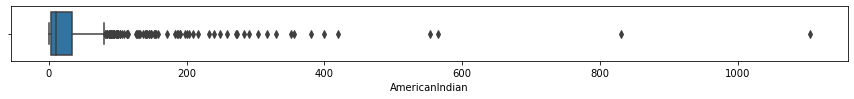

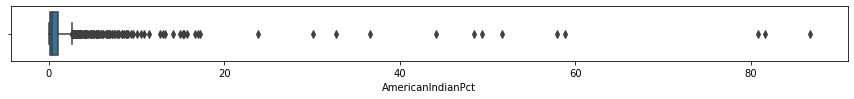

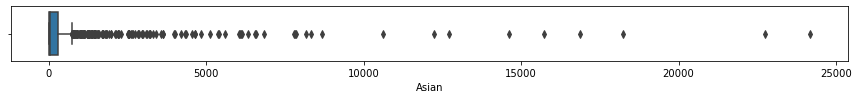

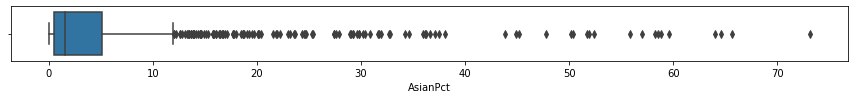

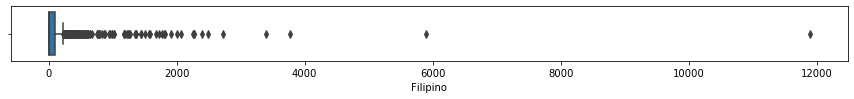

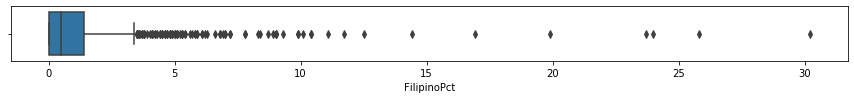

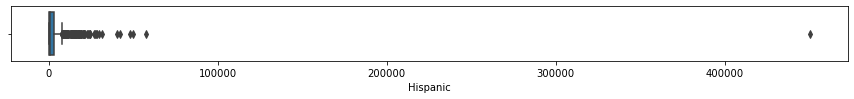

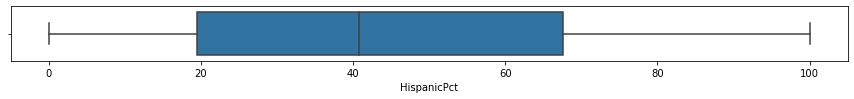

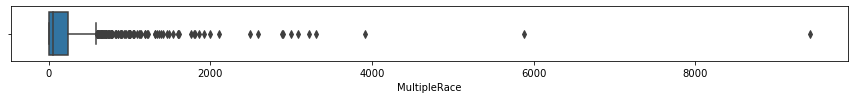

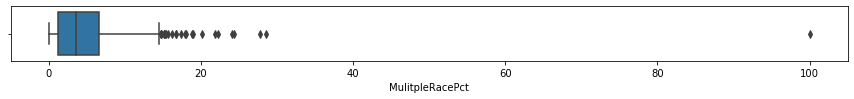

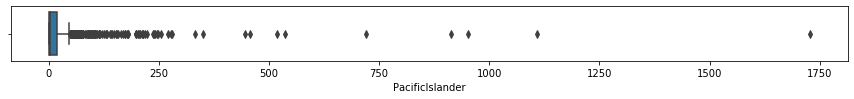

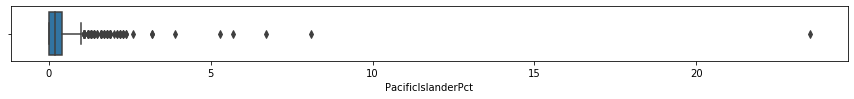

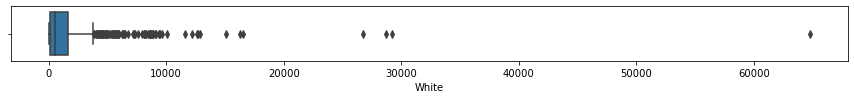

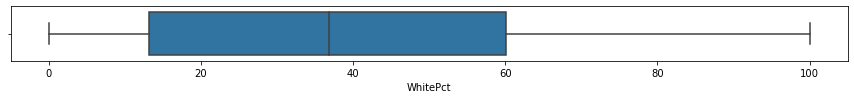

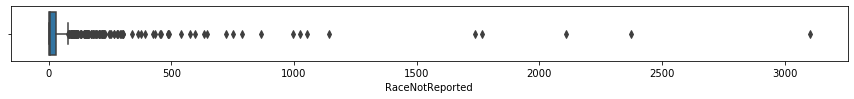

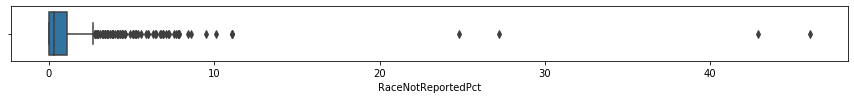

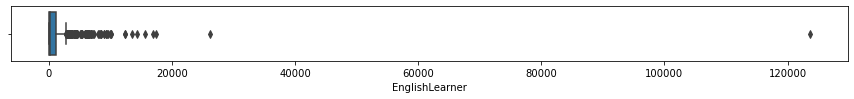

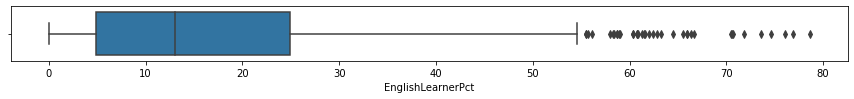

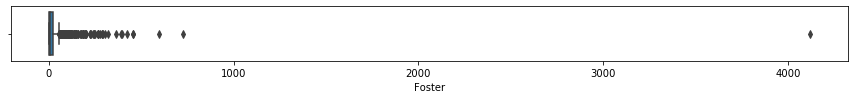

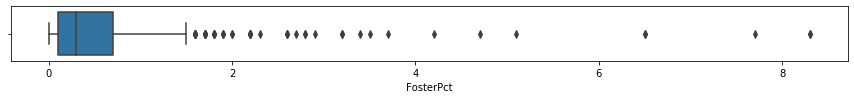

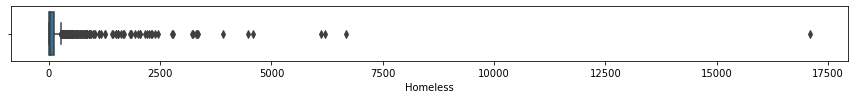

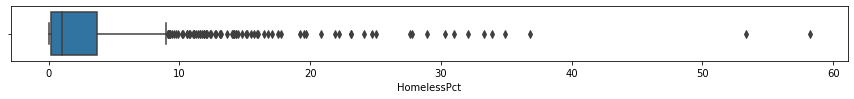

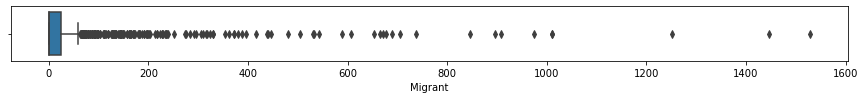

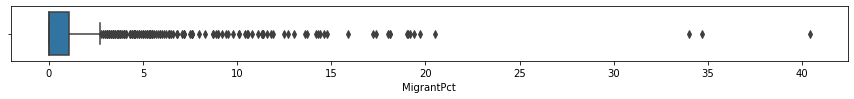

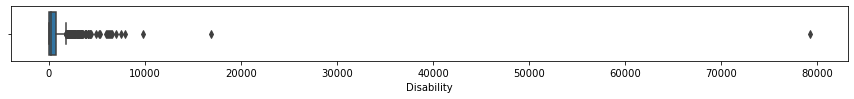

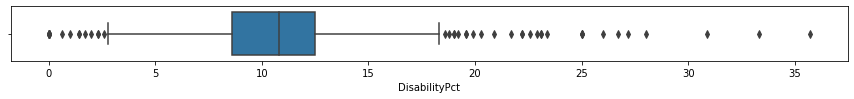

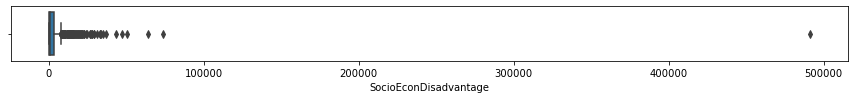

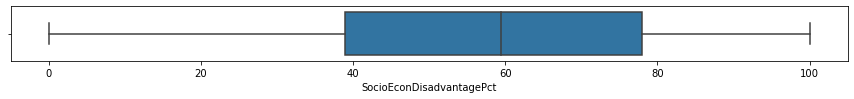

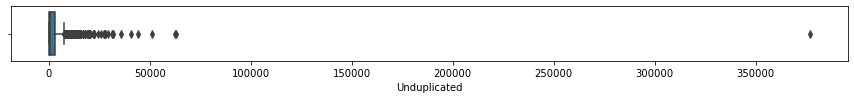

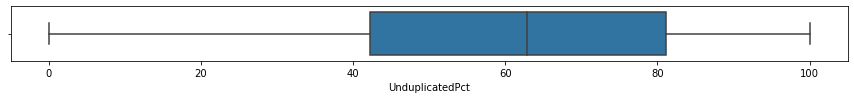

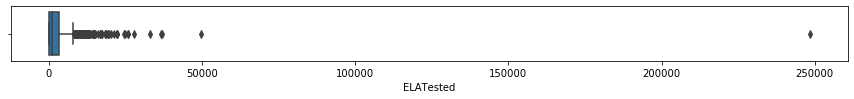

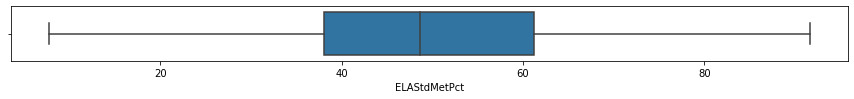

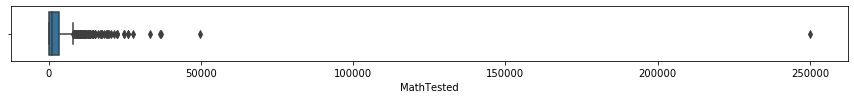

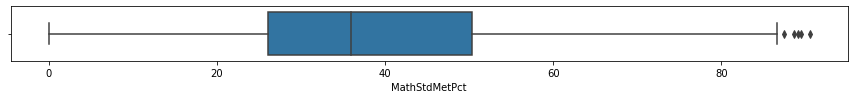

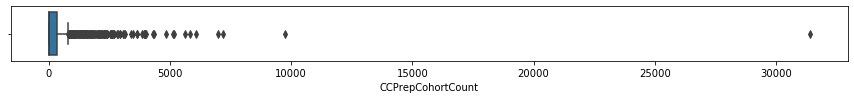

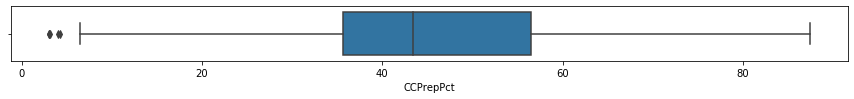

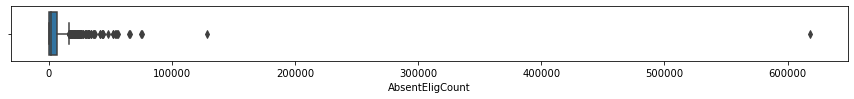

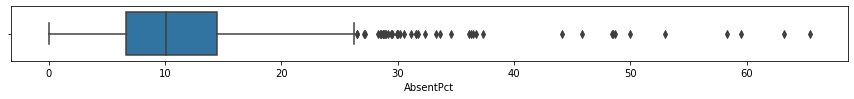

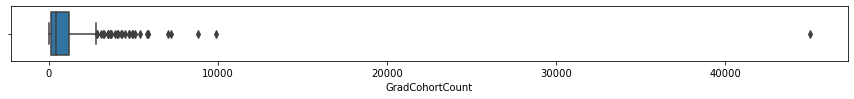

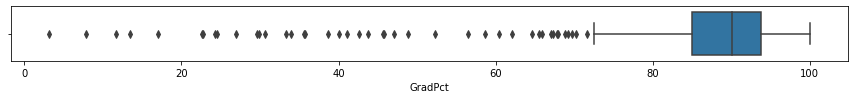

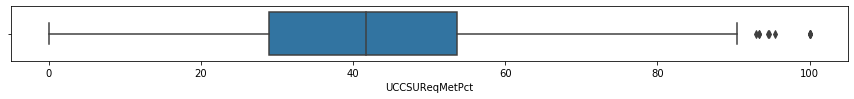

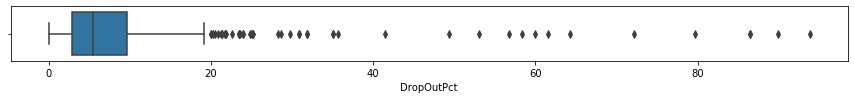

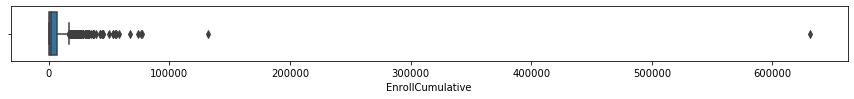

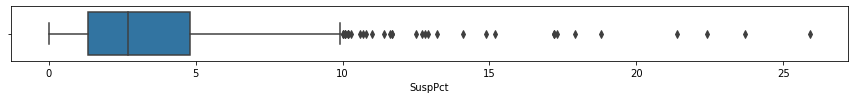

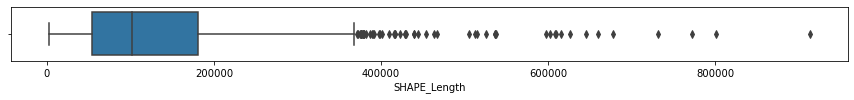

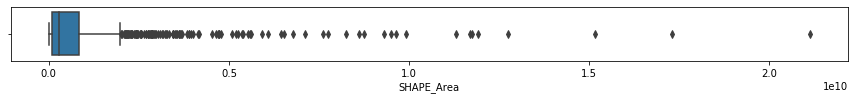

In [25]:
columns = list(df.columns)
columns.remove('CountyName')
columns.remove('Year') 
columns.remove('SchoolName')
columns.remove('SchoolType')
columns.remove('GradeLow')
columns.remove('GradeLowCensus')
columns.remove('AssistStatus')
columns.remove('CongressUS')
columns.remove('SenateCA')
columns.remove('AssemblyCA')
columns.remove('LocaleDistrict')
columns.remove('UpdateNotes')

for item in columns:
    plt.figure(figsize=(15,1))
    sns.boxplot(data=df, x=item);

In [55]:
# large outlier -- for la

In [ ]:
# feature --- bins enrollment

## EDA

In [26]:
# df.describe()

In [13]:
df.corr()

,GradeHigh,GradeHighCensus,EnrollTotal,EnrollCharter,EnrollNonCharter,AfricanAmerican,AfricanAmericanPct,AmericanIndian,AmericanIndianPct,Asian,AsianPct,Filipino,FilipinoPct,Hispanic,HispanicPct,MultipleRace,MulitpleRacePct,PacificIslander,PacificIslanderPct,White,WhitePct,RaceNotReported,RaceNotReportedPct,EnglishLearner,EnglishLearnerPct,Foster,FosterPct,Homeless,HomelessPct,Migrant,MigrantPct,Disability,DisabilityPct,SocioEconDisadvantage,SocioEconDisadvantagePct,Unduplicated,UnduplicatedPct,ELATested,ELAStdMetPct,MathTested,MathStdMetPct,CCPrepCohortCount,CCPrepPct,AbsentEligCount,AbsentPct,GradCohortCount,GradPct,UCCSUReqMetPct,DropOutPct,EnrollCumulative,SuspPct,SHAPE_Length,SHAPE_Area
GradeHigh,1.000000,0.844018,0.182634,0.087234,0.205867,0.136403,0.223083,0.284614,0.017180,0.190312,0.086661,0.195331,0.129208,0.139632,0.112969,0.255526,-0.094311,0.207371,0.026610,0.263017,-0.190633,0.169587,-0.043793,0.140199,-0.081116,0.145950,0.010118,0.145960,0.022706,0.137868,-0.002744,0.170000,0.109096,0.144030,0.082316,0.162872,0.081914,0.171119,-0.071639,0.170470,-0.204275,NaN,NaN,0.184542,0.201299,NaN,NaN,NaN,NaN,0.185207,0.318385,0.351984,0.269594
GradeHighCensus,0.844018,1.000000,0.196336,0.064150,0.230211,0.142676,0.154729,0.291584,0.028665,0.221849,0.118964,0.201124,0.115617,0.150147,0.112090,0.272142,-0.095236,0.216400,-0.003260,0.277391,-0.190761,0.175897,-0.045679,0.150925,-0.079202,0.150641,-0.002668,0.164532,0.030037,0.169703,0.033937,0.183267,0.105539,0.154589,0.062621,0.180561,0.035668,0.189130,-0.032015,0.188377,-0.166957,NaN,NaN,0.198028,0.179886,0.129020,0.359917,0.238419,-0.310807,0.198506,0.367075,0.406597,0.313254
EnrollTotal,0.182634,0.196336,1.000000,0.923403,0.993333,0.945557,0.189111,0.645841,-0.060565,0.616651,0.116933,0.849938,0.123108,0.979638,0.099107,0.430324,-0.054949,0.773439,0.027293,0.822080,-0.169903,0.476102,-0.024123,0.974698,0.033394,0.952893,0.001965,0.827689,0.011716,0.243908,-0.057949,0.997185,0.062342,0.985358,0.038232,0.986358,0.038503,0.992318,0.017623,0.992428,0.006960,0.920238,0.036344,0.999845,0.020055,0.955979,0.017361,0.144421,-0.037794,0.999530,-0.004888,0.109531,0.002437
EnrollCharter,0.087234,0.064150,0.923403,1.000000,0.872998,0.911227,0.120633,0.556351,-0.023000,0.439856,0.006295,0.735903,0.034137,0.938913,0.038805,0.217658,-0.022693,0.640747,0.012906,0.697536,-0.058991,0.377335,0.004320,0.908972,0.005596,0.908819,0.003555,0.729220,-0.003807,0.150201,-0.034341,0.933873,0.030858,0.942633,0.032598,0.907948,0.046230,0.885509,-0.026756,0.886278,-0.023098,0.804117,-0.039565,0.922290,0.043123,0.873444,-0.082482,0.044309,0.051034,0.922475,-0.034936,0.121586,0.019235
EnrollNonCharter,0.205867,0.230211,0.993333,0.872998,1.000000,0.927812,0.204066,0.653554,-0.070050,0.651452,0.146692,0.858968,0.146176,0.962801,0.114278,0.481427,-0.063007,0.790342,0.030804,0.835093,-0.198172,0.491639,-0.031950,0.965517,0.040751,0.937856,0.001430,0.832704,0.016031,0.264815,-0.063320,0.986611,0.069948,0.968952,0.038789,0.980640,0.035040,0.995085,0.030447,0.994994,0.015793,0.934847,0.059127,0.993523,0.012530,0.956271,0.047824,0.171609,-0.064305,0.993035,0.004284,0.102660,-0.002681
AfricanAmerican,0.136403,0.142676,0.945557,0.911227,0.927812,1.000000,0.335091,0.626135,-0.039778,0.531771,0.042089,0.796486,0.090910,0.932530,0.072627,0.388876,-0.035559,0.809053,0.049902,0.719589,-0.144246,0.454457,-0.016475,0.925534,0.017903,0.944575,0.041984,0.774073,0.004613,0.169535,-0.057211,0.952001,0.068204,0.953261,0.078188,0.945722,0.075928,0.930070,-0.045151,0.930272,-0.047377,0.847721,-0.051544,0.945943,0.079290,0.892037,-0.034651,0.098020,0.012086,0.946396,0.022076,0.114576,0.012946
AfricanAmericanPct,0.223083,0.154729,0.189111,0.120633,0.204066,0.335091,1.000000,0.207655,-0.071351,0.128867,0.047926,0.208641,0.204877,0.153600,0.056389,0.267625,0.009477,0.337708,0.158271,0.157293,-0.254963,0.169005,-0.042506,0.171951,-0.027514,0.240014,0.128667,0.164632,-0.019626,-0.016338,-0.150872,0.186923,0.105785,0.181953,0.135078,0.

In [ ]:
# absenteligcount

In [58]:
# df.hist(bins=10, figsize=(25,25))
# plt.show()

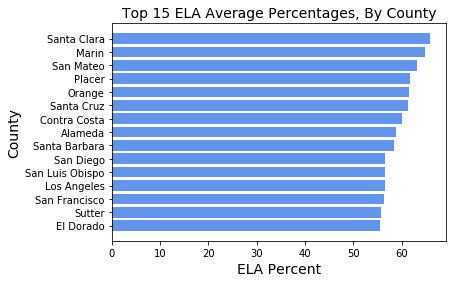

In [29]:
# top 15 schools counties
y = df.groupby('CountyName')['ELAStdMetPct'].mean().sort_values(ascending=False).head(15)
x = y.index

plt.title('Top 15 ELA Average Percentages, By County',fontsize=14);
plt.xlabel('ELA Percent', fontsize=14);
plt.ylabel('County', fontsize=14);

plt.barh(x,y, color='cornflowerblue');
plt.gca().invert_yaxis()

In [31]:
# Differentiated Assitance is additional help
df.AssistStatus.value_counts()

General Assistance           638
Differentiated Assistance    303
No Status                      3
Name: AssistStatus, dtype: int64

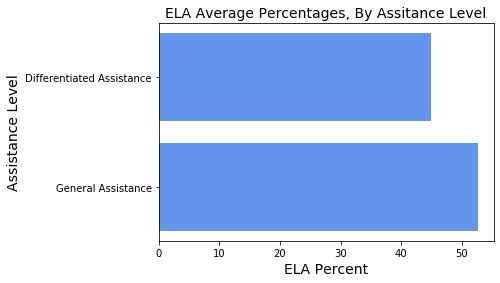

In [35]:
y = df.groupby('AssistStatus')['ELAStdMetPct'].mean().sort_values(ascending=True).head(2)
x = y.index

plt.title('ELA Average Percentages, By Assitance Level',fontsize=14);
plt.xlabel('ELA Percent', fontsize=14);
plt.ylabel('Assistance Level', fontsize=14);

plt.barh(x,y, color='cornflowerblue');
plt.gca().invert_yaxis()

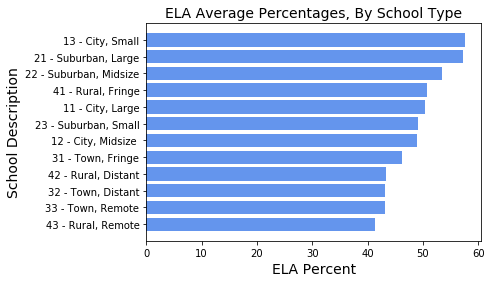

In [38]:
y = df.groupby('LocaleDistrict')['ELAStdMetPct'].mean().sort_values(ascending=True)
x = y.index

plt.title('ELA Average Percentages, By School Type',fontsize=14);
plt.xlabel('ELA Percent', fontsize=14);
plt.ylabel('School Description', fontsize=14);

plt.barh(x,y, color='cornflowerblue');

In [39]:
df.head()

,Year,CountyName,SchoolName,SchoolType,GradeLow,GradeHigh,GradeLowCensus,GradeHighCensus,AssistStatus,CongressUS,SenateCA,AssemblyCA,LocaleDistrict,UpdateNotes,EnrollTotal,EnrollCharter,EnrollNonCharter,AfricanAmerican,AfricanAmericanPct,AmericanIndian,AmericanIndianPct,Asian,AsianPct,Filipino,FilipinoPct,Hispanic,HispanicPct,MultipleRace,MulitpleRacePct,PacificIslander,PacificIslanderPct,White,WhitePct,RaceNotReported,RaceNotReportedPct,EnglishLearner,EnglishLearnerPct,Foster,FosterPct,Homeless,HomelessPct,Migrant,MigrantPct,Disability,DisabilityPct,SocioEconDisadvantage,SocioEconDisadvantagePct,Unduplicated,UnduplicatedPct,ELATested,ELAStdMetPct,MathTested,MathStdMetPct,CCPrepCohortCount,CCPrepPct,AbsentEligCount,AbsentPct,GradCohortCount,GradPct,UCCSUReqMetPct,DropOutPct,EnrollCumulative,SuspPct,SHAPE_Length,SHAPE_Area
0,2018-19,Alameda,Alameda Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,18,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,11260,1877,9383,825,7.300000,28,0.2,2854,25.299999,683,6.1,1960,17.400000,1310,11.6,67,0.6,3244,28.799999,289,2.6,1601,14.2,26,0.2,67,0.6,0,0.0,1289,11.4,3523,31.299999,3144,33.500000,4567.0,69.400002,4587.0,59.700001,773.0,56.799999,11453.0,9.4,882.0,88.900002,58.900002,5.2,11600.0,2.6,57196.403944,4.733304e+07
1,2018-19,Alameda,Albany City Unified,Unified,KG,12,KG,12,General Assistance,13,09,15,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,3682,0,3682,111,3.000000,4,0.1,1063,28.900000,47,1.3,592,16.100000,510,13.9,6,0.2,1163,31.600000,186,5.1,583,15.8,2,0.1,12,0.3,0,0.0,312,8.5,777,21.100000,1118,30.400000,1773.0,79.199997,1795.0,72.000000,302.0,62.599998,3763.0,6.4,301.0,94.699997,63.900002,1.7,3830.0,1.9,12870.772156,7.161276e+06
2,2018-19,Alameda,Berkeley Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"12 - City, Midsize",2018-19 District Boundary Adjustment/Correction,10194,383,9811,1440,14.100000,16,0.2,731,7.200000,83,0.8,2438,23.900000,1465,14.4,14,0.1,3999,39.200001,8,0.1,953,9.3,23,0.2,265,2.6,0,0.0,1148,11.3,3331,32.700001,3275,33.400002,4614.0,66.699997,4549.0,61.700001,790.0,63.299999,10404.0,9.7,856.0,87.400002,83.300003,10.7,10534.0,1.4,44426.287405,4.376389e+07
3,2018-19,Alameda,Castro Valley Unified,Unified,KG,12,KG,12,General Assistance,"13,15","07,09,10","18,20","21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,9269,0,9269,489,5.300000,19,0.2,2539,27.400000,420,4.5,2204,23.799999,909,9.8,47,0.5,2480,26.799999,162,1.7,1021,11.0,12,0.1,68,0.7,0,0.0,800,8.6,2284,24.600000,2739,29.600000,4844.0,68.099998,4850.0,63.200001,737.0,57.099998,9433.0,7.4,742.0,92.599998,55.900002,3.0,9532.0,2.2,142338.494091,2.833205e+08
4,2018-19,Alameda,Emery Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,743,0,743,326,43.900002,1,0.1,83,11.200000,11,1.5,185,24.900000,62,8.3,8,1.1,67,9.000000,0,0.0,160,21.5,1,0.1,7,0.9,0,0.0,55,7.4,600,80.800003,613,83.099998,376.0,37.099998,377.0,23.299999,40.0,22.500000,760.0,20.5,40.0,100.000000,40.000000,0.0,780.0,3.6,13762.869292,5.368212e+06


In [ ]:
# visualization on school racial composition by county

In [40]:
df.HomelessPct.describe()

count    944.000000
mean       3.154449
std        5.547407
min        0.000000
25%        0.200000
50%        1.000000
75%        3.725000
max       58.200001
Name: HomelessPct, dtype: float64

In [41]:
df.SocioEconDisadvantagePct.describe()

count    944.000000
mean      57.559110
std       25.054015
min        0.000000
25%       38.975001
50%       59.500000
75%       77.925002
max      100.000000
Name: SocioEconDisadvantagePct, dtype: float64

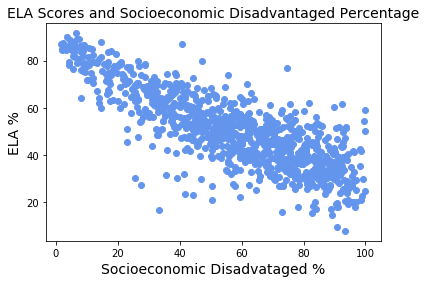

In [51]:
x = df.SocioEconDisadvantagePct
y = df.ELAStdMetPct

plt.title('ELA Scores and Socioeconomic Disadvantaged Percentage',fontsize=14);
plt.xlabel('Socioeconomic Disadvataged %', fontsize=14);
plt.ylabel('ELA %', fontsize=14);

plt.scatter(x,y, color='cornflowerblue');

#### The more socioeconomic desadvantages present, the lower the passing rate of the ELA exam

Elementary    524
Unified       344
High           76
Name: SchoolType, dtype: int64